In [76]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [98]:
def z_score_cutoff(data_series):
    mean = data_series.mean()
    std = data_series.std()
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std
    return lower_bound, upper_bound

def iqr_cutoff(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [89]:
o = pd.read_csv("./online.csv",sep=";").query("product == 'ORCHIDS'")

In [145]:
# load prices data to one df
prices = [pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_-1.csv",sep=";"),
          pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_0.csv",sep=";"),
        #   pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_1.csv",sep=";")
          ]
prices = pd.concat(prices, axis = 0)
prices['timestamp_new'] = (prices['DAY'] + 1) * 1000000 + prices['timestamp'] + 100
prices.set_index('timestamp_new', inplace = True)

In [266]:
day1 = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_-1.csv",sep=";")
day2 = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_0.csv",sep=";")
# day3 = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_1.csv",sep=";")

<Axes: xlabel='SUNLIGHT', ylabel='Density'>

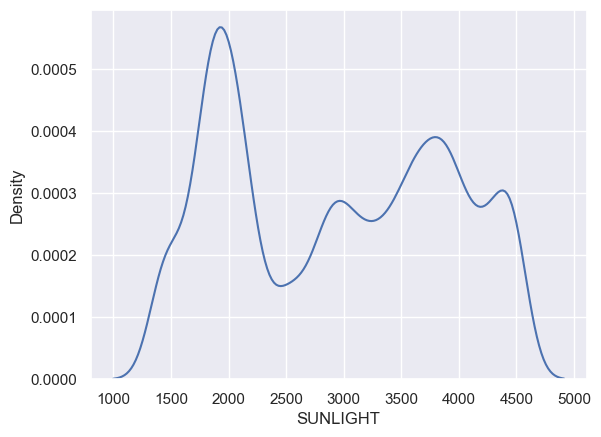

In [142]:
sns.kdeplot(prices['SUNLIGHT'])

In [603]:
def feature_engineering(df):
    temp = df.copy()
    temp['HUMIDITY_high'] = (temp['HUMIDITY'] > 80).astype(int)
    temp['HUMIDITY_low'] = (temp['HUMIDITY'] < 60).astype(int)
    temp['sunlight_cumsum'] = np.log(np.cumsum(temp['SUNLIGHT']))
    temp['enough_sunlight_count'] = np.where(temp['SUNLIGHT'] >= 2500, 1, 0).cumsum()
    temp['time_gone'] = temp.index + 1
    temp['sunlight_pct'] = temp['enough_sunlight_count'] / temp['time_gone'] 
    temp['time_left'] =  (10001 - temp['enough_sunlight_count']) / 10001 
    temp['sunligh_change'] = temp['SUNLIGHT'] / temp['SUNLIGHT'].shift() - 1
    temp['humidity_change'] = temp['HUMIDITY'] - temp['HUMIDITY'].shift()
    temp['humidity_up_diff'] = (temp['HUMIDITY'] -80).apply(lambda x: max(x,0))/ 5
    temp['humidity_down_diff'] = (60 - temp['HUMIDITY'] ).apply(lambda x: min(x,0))/ 5
    temp['target'] = (temp["ORCHIDS"].shift(-20) / temp["ORCHIDS"]) - 1
    # temp['target'] = temp['ORCHIDS'].shift(-1)
    return temp[['SUNLIGHT','HUMIDITY','sunlight_pct','sunligh_change', 'humidity_change','humidity_up_diff', 'humidity_down_diff', 'target']][1:-20]
    # return temp[['SUNLIGHT','HUMIDITY', 'target']][1:-1]

In [604]:
df = pd.concat([feature_engineering(day1),feature_engineering(day2)], axis = 0)

<Axes: xlabel='target', ylabel='Density'>

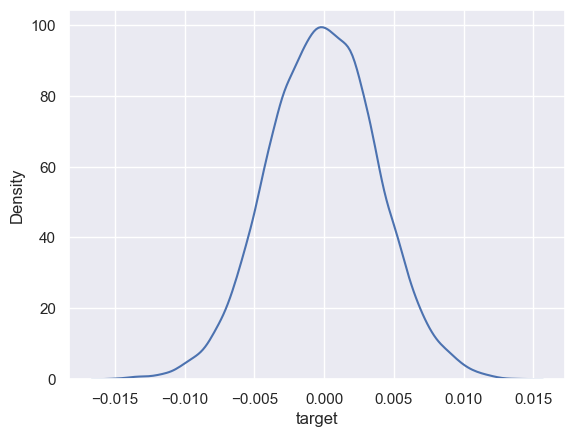

In [605]:
sns.kdeplot(df['target'])

<Axes: >

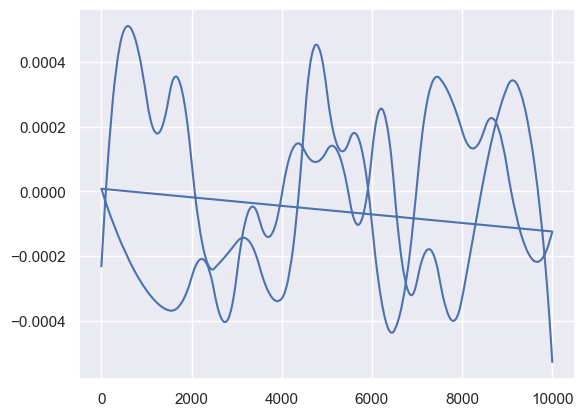

In [352]:
df['sunligh_change'].plot()

In [321]:
df = day1

fig = plt.figure(figsize=[200,80])
# ax1 = fig.add_subplot(111, ylabel='Google price in $')
df["ORCHIDS"].plot(ax=ax1, color='b', lw=2)
df["HUMIDITY"].plot(ax=ax1, color='r', lw=2)
plt.title("Turtle Trading Strategy")
plt.show()

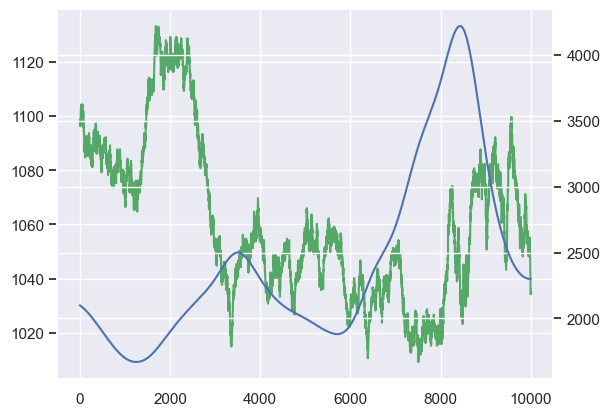

In [161]:
# Sample data
# Plot the first line
fig, ax1 = plt.subplots()
ax1.plot(day3["ORCHIDS"], 'g-')
# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(day3["SUNLIGHT"], 'b-')
# ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [297]:
df

ORCHIDS   SUNLIGHT   HUMIDITY  HUMIDITY_high  HUMIDITY_low  \
1      1201.75  2499.4197  79.004100              0             0   
2      1201.75  2498.8457  79.008210              0             0   
3      1201.75  2498.2780  79.012340              0             0   
4      1201.75  2497.7166  79.016490              0             0   
5      1200.25  2497.1614  79.020660              0             0   
...        ...        ...        ...            ...           ...   
9996    988.25  1703.5710  64.989100              0             0   
9997    988.00  1702.6835  64.991806              0             0   
9998    988.75  1701.7925  64.994530              0             0   
9999    986.75  1700.8980  64.997260              0             0   
10000   985.75  1700.0000  65.000000              0             0   

       sunlight_cumsum  sunlight_pct  time_left  sunligh_change  \
1             8.517077      0.500000   0.999900       -0.000232   
2             8.922427      0.333333   0.999900       -0.000230   
3             9.209995      0.250000   0.999900       -0.000227   
4             9.433025      0.200000   0.999900       -0.000225   
5             9.615233      0.166667   0.999900       -0.000222   
...                ...           ...        ...             ...   
9996         16.941868      0.234470   0.765623       -0.000519   
9997         16.941943      0.234447   0.765623       -0.000521   
9998         16.942017      0.234423   0.765623       -0.000523   
9999         16.942092      0.234400   0.765623       -0.000526   
10000        16.942166      0.234377   0.765623       -0.000528   

       humidity_change  humidity_up_diff  humidity_down_diff  
1             0.004100               0.0           -3.800820  
2             0.004110               0.0           -3.801642  
3             0.004130               0.0           -3.802468  
4             0.004150               0.0           -3.803298  
5             0.004170               0.0           -3.804132  
...                ...               ...                 ...  
9996          0.002700               0.0           -0.997820  
9997          0.002706               0.0           -0.998361  
9998          0.002724               0.0           -0.998906  
9999          0.002730               0.0           -0.999452  
10000         0.002740               0.0           -1.000000  

[20000 rows x 12 columns]

In [212]:
day1

timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1200.00             1.5           10.5           -2.0   
1            100  1201.75             1.5            9.5           -2.0   
2            200  1201.75             1.5            9.5           -2.0   
3            300  1201.75             1.5            9.5           -2.0   
4            400  1201.75             1.5            9.5           -2.0   
...          ...      ...             ...            ...            ...   
9996      999600  1227.75             1.4            8.5           -3.0   
9997      999700  1226.75             1.4            8.5           -3.0   
9998      999800  1227.75             1.4            8.5           -3.0   
9999      999900  1228.00             1.4            8.5           -3.0   
10000    1000000  1228.00             1.4            8.5           -3.0   

        SUNLIGHT   HUMIDITY  DAY  HUMIDITY_high  HUMIDITY_low  ...  \
0      2500.0000  79.000000   -1              0             0  ...   
1      2499.4197  79.004100   -1              0             0  ...   
2      2498.8457  79.008210   -1              0             0  ...   
3      2498.2780  79.012340   -1              0             0  ...   
4      2497.7166  79.016490   -1              0             0  ...   
...          ...        ...  ...            ...           ...  ...   
9996   3901.9530  83.025764   -1              1             0  ...   
9997   3901.4612  83.019300   -1              1             0  ...   
9998   3900.9720  83.012856   -1              1             0  ...   
9999   3900.4849  83.006424   -1              1             0  ...   
10000  3900.0000  83.000000   -1              1             0  ...   

       sunlight_cumsum  sunlight_pct  time_left  sunligh_change  \
0             7.824046      1.000000   0.999900             NaN   
1             8.517077      0.500000   0.999900       -0.000232   
2             8.922427      0.333333   0.999900       -0.000230   
3             9.209995      0.250000   0.999900       -0.000227   
4             9.433025      0.200000   0.999900       -0.000225   
...                ...           ...        ...             ...   
9996         17.404170      0.979394   0.020998       -0.000127   
9997         17.404277      0.979396   0.020898       -0.000126   
9998         17.404385      0.979398   0.020798       -0.000125   
9999         17.404493      0.979400   0.020698       -0.000125   
10000        17.404601      0.979402   0.020598       -0.000124   

       humididy_change  humididy_up  humididy_down  humidity_change  \
0                  NaN     0.000000      -3.800000              NaN   
1             0.004100     0.000000      -3.800820         0.004100   
2             0.004110     0.000000      -3.801642         0.004110   
3             0.004130     0.000000      -3.802468         0.004130   
4             0.004150     0.000000      -3.803298         0.004150   
...                ...          ...            ...              ...   
9996         -0.006476     0.605153      -4.605153        -0.006476   
9997         -0.006464     0.603860      -4.603860        -0.006464   
9998         -0.006444     0.602571      -4.602571        -0.006444   
9999         -0.006432     0.601285      -4.601285        -0.006432   
10000        -0.006424     0.600000      -4.600000        -0.006424   

       humidity_up_diff  humidity_down_diff  
0              0.000000           -3.800000  
1              0.000000           -3.800820  
2              0.000000           -3.801642  
3              0.000000           -3.802468  
4              0.000000           -3.803298  
...                 ...                 ...  
9996           0.605153           -4.605153  
9997           0.603860           -4.603860  
9998           0.602571           -4.602571  
9999           0.601285           -4.601285  
10000          0.600000           -4.600000  

[10001 rows x 23 columns]

In [219]:
np.corrcoef(day1["ORCHIDS"][1:], day1["humididy_change"][1:])

array([[ 1.        , -0.24638791],
       [-0.24638791,  1.        ]])

In [216]:
np.corrcoef((day1["ORCHIDS"] / day1["ORCHIDS"].shift() - 1)[1:], day1["sunlight_cumsum"][1:])

array([[ 1.        , -0.00268473],
       [-0.00268473,  1.        ]])

In [ ]:
product = 'STARFRUIT'
endpoint= 5000
plt.figure(figsize=[200,80])
# data.query(f"product == '{product}'")['mid_price'][:endpoint].plot(color='blue', lw=2., legend=True)
plt.plot(s.query(f"product == '{product}'")['vwap'][:endpoint],color='y', lw=2.)
# s.query(f"product == '{product}'")['bid_price_1'][:endpoint].plot(color='g', lw=2., legend=True)
# data.query(f"product == '{product}'")['ask_price_1'][:endpoint].plot(color='r', lw=2., legend=True)
for i in signal[:endpoint].index:
    if signal[i]:
        plt.axvline(x=i, color='g', linestyle='--', linewidth=2)
    if neg_signal[i]:
        plt.axvline(x=i, color='r', linestyle='--', linewidth=2)
plt.show()

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
import optuna
from sklearn.metrics import mean_squared_error

In [606]:
def objective(trial, X_train, y_train, X_val, y_val) -> float:
    '''
    The oobjective function for the optimisation problem.
    
    Args:
        trial: optuna.trial object
        X_train: ndarray or DataFrame, The features of training dataset
        y_train: Index or array-like, The Target of training dataset
        X_val: ndarray or DataFrame, The features of validation dastaset
        y_val: Index or array-like, The Target of validation dataset

    Returns:
        numeric, the performance mertic for the model training
    '''
    # the parameters you want to optimise and the sapce you wanna search
    param_grid = {
        'alpha': trial.suggest_float('alpha', 1e-15, 100.0, log = True),
    }
    model =  Lasso(
        fit_intercept=False,
        **param_grid)
    
    model.fit(
        X_train,
        y_train
    )
    
    coef = model.coef_
    intercept = model.intercept_
    
    y_pred = model.predict(X_val)
    
    # profit = hypertune.get_profit(round_1_train.Trader(intercept = intercept, coef = coef))
    mse = mean_squared_error(y_val, y_pred)
    return -mse

def hyper_tune(X_train, y_train, direction="maximize", n_trials=30, test_size=0.3):
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=42)
    study_name="Linear Regression"
    direction=direction # maximize or minimize
    n_trials=n_trials

    study = optuna.create_study(direction=direction, study_name=study_name)
    func = lambda trial: objective(trial, X_train, y_train, X_val, y_val)
    study.optimize(func, n_trials=n_trials)
    return study

In [607]:
Lasso(fit_intercept=False)

Lasso(fit_intercept=False)

In [608]:
study = hyper_tune(df.drop(columns=['target']),df['target'])

[I 2024-04-14 19:56:42,965] A new study created in memory with name: Linear Regression
[I 2024-04-14 19:56:43,006] Trial 0 finished with value: -1.5466833060766983e-05 and parameters: {'alpha': 17.788517927970506}. Best is trial 0 with value: -1.5466833060766983e-05.
/Users/Leo.Leung/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e-01, tolerance: 2.096e-05
  model = cd_fast.enet_coordinate_descent(
[I 2024-04-14 19:56:43,724] Trial 1 finished with value: -1.535656276205784e-05 and parameters: {'alpha': 1.9500178211675058e-14}. Best is trial 1 with value: -1.535656276205784e-05.
[I 2024-04-14 19:56:44,251] Trial 2 finished with value: -1.536776927193704e-05 and parameters: {'alpha': 4.098866872657143e-08}. Best is trial 1 with value: -1.535656276205784e-

In [609]:
study.best_params

{'alpha': 1.394102835441889e-15}

In [610]:
clf = Ridge(fit_intercept=False, **study.best_params)
clf.fit(df.drop(columns=['target']),df['target'])

Ridge(alpha=1.394102835441889e-15, fit_intercept=False)

In [611]:
X_test, y_test = feature_engineering(day3).drop(columns=['target']),feature_engineering(day3)['target']

In [612]:
y_pred =  clf.predict(X_test)
mean_squared_error(y_test, y_pred)
clf.score(X_test,y_test)

-0.015596193435532646

In [613]:
clf.coef_

array([ 2.18151897e-08, -7.49722830e-06, -7.43716702e-04,  3.88835688e-01,
        1.00772254e-02, -3.23565678e-04, -3.26721103e-04])

In [572]:
y_pred+1

array([1.00021158, 1.00021217, 1.00021267, ..., 1.00005669, 1.0000574 ,
       1.0000581 ])

In [560]:
day3['ORCHIDS'][9:-1]

9       1097.25
10      1097.50
11      1096.25
12      1098.25
13      1097.75
         ...   
9995    1038.75
9996    1036.25
9997    1036.25
9998    1036.25
9999    1034.25
Name: ORCHIDS, Length: 9991, dtype: float64

In [573]:
(y_pred+1) * day3['ORCHIDS'][1:-10]

1       1098.482370
2       1096.982698
3       1097.233296
4       1097.483992
5       1097.984641
           ...     
9986    1048.807972
9987    1048.308671
9988    1045.309259
9989    1044.309938
9990    1044.310675
Name: ORCHIDS, Length: 9990, dtype: float64

In [574]:
(y_test+1) * day3['ORCHIDS'][1:-10]

1       1096.25
2       1098.25
3       1097.75
4       1098.75
5       1097.75
         ...   
9986    1036.25
9987    1036.25
9988    1036.25
9989    1034.25
9990    1035.25
Length: 9990, dtype: float64

In [565]:
day3['ORCHIDS'][1:-10]

1       1098.25
2       1096.75
3       1097.00
4       1097.25
5       1097.75
         ...   
9986    1048.75
9987    1048.25
9988    1045.25
9989    1044.25
9990    1044.25
Name: ORCHIDS, Length: 9990, dtype: float64

In [510]:
y_pred

array([1098.26364165, 1096.76390381, 1097.01383379, ..., 1036.26510568,
       1036.26519277, 1034.26564901])

In [575]:
df

SUNLIGHT  HUMIDITY  sunlight_pct  sunligh_change  humidity_change  \
1     2499.4197  79.00410      0.500000       -0.000232         0.004100   
2     2498.8457  79.00821      0.333333       -0.000230         0.004110   
3     2498.2780  79.01234      0.250000       -0.000227         0.004130   
4     2497.7166  79.01649      0.200000       -0.000225         0.004150   
5     2497.1614  79.02066      0.166667       -0.000222         0.004170   
...         ...       ...           ...             ...              ...   
9986  1712.2555  64.96258      0.234705       -0.000496         0.002596   
9987  1711.4026  64.96518      0.234682       -0.000498         0.002600   
9988  1710.5463  64.96780      0.234658       -0.000500         0.002620   
9989  1709.6865  64.97042      0.234635       -0.000503         0.002620   
9990  1708.8232  64.97306      0.234611       -0.000505         0.002640   

      humidity_up_diff  humidity_down_diff    target  
1                  0.0           -3.800820  0.000832  
2                  0.0           -3.801642  0.000000  
3                  0.0           -3.802468 -0.001664  
4                  0.0           -3.803298 -0.001664  
5                  0.0           -3.804132 -0.000417  
...                ...                 ...       ...  
9986               0.0           -0.992516 -0.000506  
9987               0.0           -0.993036 -0.001768  
9988               0.0           -0.993560 -0.000758  
9989               0.0           -0.994084 -0.002779  
9990               0.0           -0.994612 -0.005549  

[19980 rows x 8 columns]

In [577]:
len(df)*0.8

15984.0

In [582]:
train = df.iloc[:15984]  # First 80% as training set
test = df.iloc[15984:]   # Last 20% as test set

In [583]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit the model
model_var = VAR(train)
results = model_var.fit(maxlags=15, ic='aic')  # Select lag order with AIC

# Predict
lag_order = results.k_ar
predictions_var = results.forecast(train.values[-lag_order:], steps=len(test))

# Convert predictions to DataFrame for easier handling
pred_df = pd.DataFrame(predictions_var, index=test.index, columns=test.columns)

# Evaluate VAR
mse_var = mean_squared_error(test['target'], pred_df['target'])

/Users/Leo.Leung/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [587]:
predictions_var

array([[2047.86147581,   65.18476907, 1040.8258762 ],
       [2048.57822361,   65.18335887, 1040.84991684],
       [2049.59917003,   65.1879434 , 1040.79152793],
       ...,
       [3785.12677274,   62.93666632,  983.81671851],
       [3785.38181324,   62.93577683,  983.78289764],
       [3785.63915247,   62.93489348,  983.74913433]])

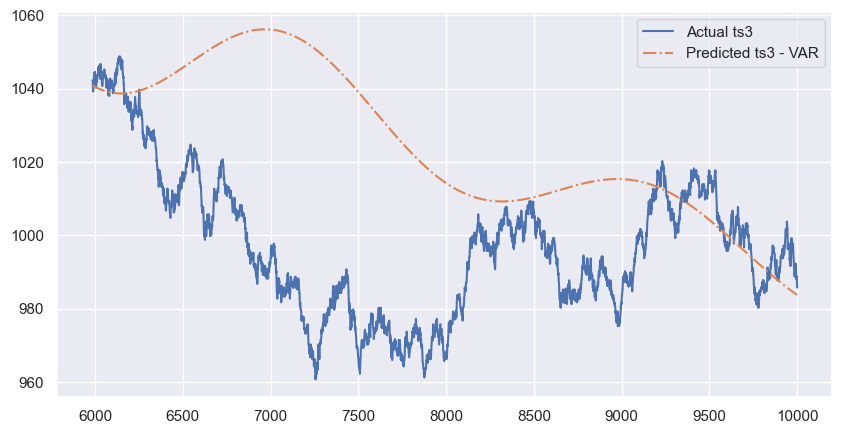

In [588]:
plt.figure(figsize=(10, 5))
plt.plot(test['target'], label='Actual ts3')
# plt.plot(test.index, predictions_var, label='Predicted ts3 - Linear Regression', linestyle='--')
plt.plot(pred_df['target'], label='Predicted ts3 - VAR', linestyle='-.')
plt.legend()
plt.show()

In [567]:
day3['ORCHIDS'][10:].reset_index(drop = True)

0       1097.50
1       1096.25
2       1098.25
3       1097.75
4       1098.75
         ...   
9986    1036.25
9987    1036.25
9988    1036.25
9989    1034.25
9990    1035.25
Name: ORCHIDS, Length: 9991, dtype: float64

In [568]:
fig = plt.figure(figsize=[200,80])
# ax1 = fig.add_subplot(111, ylabel='Google price in $')
plt.plot((y_pred+1) * day3['ORCHIDS'][1:-10], color='b', lw=2)
(day3['ORCHIDS'][10:].reset_index(drop = True)).plot( color='r', lw=2)

# plt.plot(y_pred, color='b', lw=2)
# plt.plot(y_test.shift(), color='b', lw=2)
# y_test.plot( color='r', lw=2)
plt.title("Turtle Trading Strategy")
plt.show()